In [2]:
# load packages
import numpy as np 
import scipy.io
from scipy.fft import fft, ifft
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime

In [3]:
InDataDir = 'D:\\AttnXV3_analysis\\RCA_F1\\HyperRatio_Params\\' # set dir where avg crf were be saved
FileOps = os.listdir(InDataDir) # list files in dir
print(FileOps) #list file names .. too long to type out
###################
dataIn = FileOps[3]
print('Selected File:', dataIn)
ImportFile = os.path.join(InDataDir,dataIn)
print(ImportFile)
print('Does File Exist?', os.path.exists(ImportFile))

['F1_NR_Params_ns_20240207_140807.pkl', 'F1_NR_Params_20240207_141259.pkl', 'F1_ns_NR_Params_20240207_154757.pkl', 'F1_NR_Params_20240207_165458.pkl']
Selected File: F1_NR_Params_20240207_165458.pkl
D:\AttnXV3_analysis\RCA_F1\HyperRatio_Params\F1_NR_Params_20240207_165458.pkl
Does File Exist? True


In [4]:
loadData = pkl.load(open(ImportFile, 'rb'))
print(loadData.keys())

dict_keys([0, 1, 2, 3, 'SubjNames', 'init_guess2f', 'init_guess4f', 'model_bounds', 'Paramsorder'])


In [5]:
nr_data_inds = list(loadData.keys())[:4]
data = {key: loadData[key] for key in nr_data_inds}
FName = loadData['SubjNames']
NumContrasts = loadData['Paramsorder']
######## can load other data, but not necessary right now ...
#startGuess1 = loadData['init_guess2f']
#startGuess2 = loadData['init_guess4f']
#SetModelBounds = loadData['model_bounds']

In [6]:
[NumSubs, NumParams] = np.shape(data[0])
print(f'Total Files: {NumSubs}, Total Params: {NumParams}')

Total Files: 55, Total Params: 4


### Plot Parameters 

##### Gather all C50 values

In [9]:
c50_lims = [0,20] # set exclusion criteria
c50_store = dict()
param_pos = 0
for i in range(NumParams):
    x = data[i][:,param_pos] # 55 x 4 
    c50_store[i] = np.array([num for num in x if num < c50_lims[1]])
    #print(c50_store[i].shape)

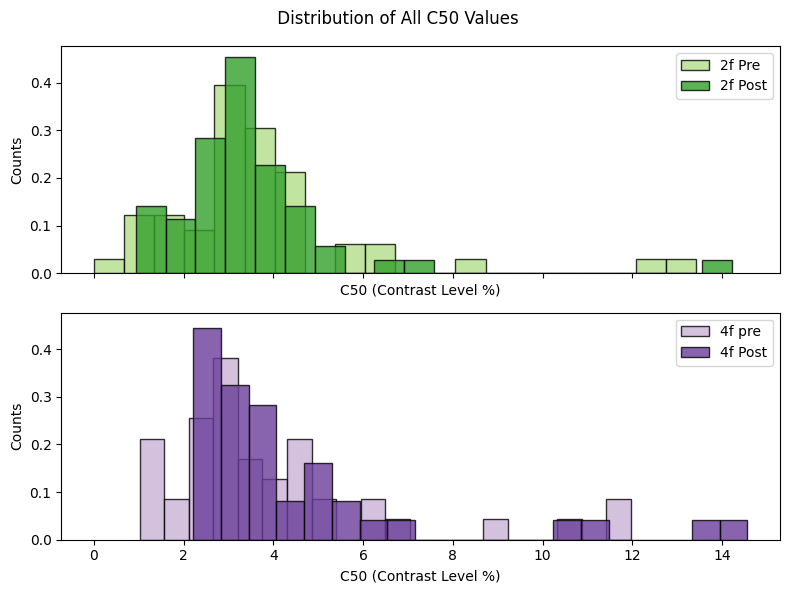

In [10]:
c  = sns.color_palette("Paired",16) 
fig, axs = plt.subplots(2,1,figsize = (8,6), sharey = True, sharex = True)

axs[0].hist(c50_store[0], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[2], label = '2f Pre')
axs[0].hist(c50_store[1], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[3], label = '2f Post')

axs[1].hist(c50_store[2], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[8], label = '4f pre')
axs[1].hist(c50_store[3], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[9], label = '4f Post')
plt.suptitle(' Distribution of All C50 Values')
axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('C50 (Contrast Level %)')
axs[1].set_xlabel('C50 (Contrast Level %)')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
plt.tight_layout()
plt.show()

##### Gather all n values

In [354]:
n_lims = [0,100] # set exclusion criteria
n_store = dict()

param_pos = 1
for i in range(NumParams):
    x = data[i][:,param_pos] # 55 x 4 
    n_store[i] = np.array([num for num in x if num < n_lims[1]])
    #print(n_store[i].shape)

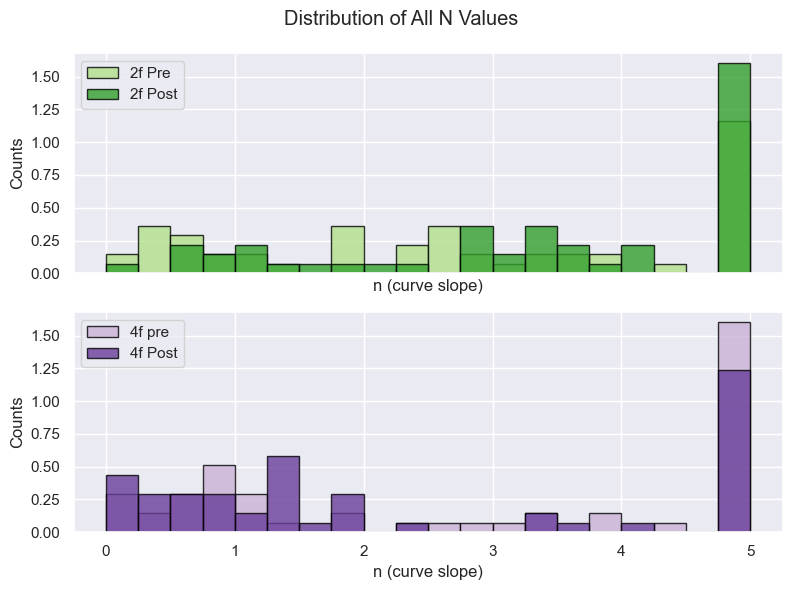

In [355]:
fig, axs = plt.subplots(2,1,figsize = (8,6), sharey = True, sharex = True)

axs[0].hist(n_store[0], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[2], label = '2f Pre')
axs[0].hist(n_store[1], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[3], label = '2f Post')

axs[1].hist(n_store[2], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[8], label = '4f pre')
axs[1].hist(n_store[3], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[9], label = '4f Post')
plt.suptitle('Distribution of All N Values')
axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('n (curve slope)')
axs[1].set_xlabel('n (curve slope)')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
plt.tight_layout()
plt.show()

##### Gather all RMax values

In [356]:
RMax_lims = [0,20] # set exclusion criteria
Rmax_store = dict()
param_pos = 2
for i in range(NumParams):
    x = data[i][:,param_pos] # 55 x 4 
    Rmax_store[i] = np.array([num for num in x if num < RMax_lims[1]])
    print(Rmax_store[i].shape)

(55,)
(55,)
(55,)
(55,)


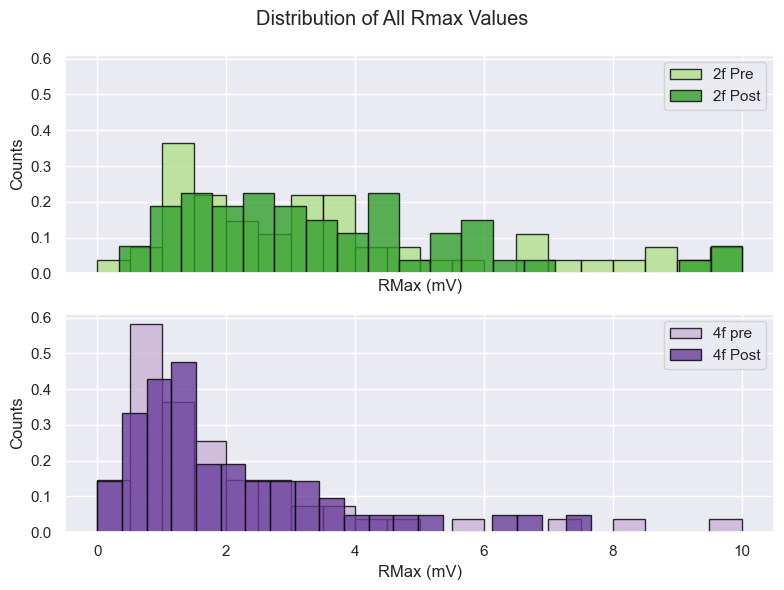

In [357]:
fig, axs = plt.subplots(2,1,figsize = (8,6), sharey = True, sharex = True)

axs[0].hist(Rmax_store[0], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[2], label = '2f Pre')
axs[0].hist(Rmax_store[1], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[3], label = '2f Post')

axs[1].hist(Rmax_store[2], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[8], label = '4f pre')
axs[1].hist(Rmax_store[3], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[9], label = '4f Post')
plt.suptitle('Distribution of All Rmax Values')
axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('RMax (mV)')
axs[1].set_xlabel('RMax (mV)')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
plt.tight_layout()
plt.show()

##### Gather all B values

In [358]:
b_lims = [0,3] # set exclusion criteria
b_store = dict()
param_pos = 3
for i in range(NumParams):
    x = data[i][:,param_pos] # 55 x 4 
    b_store[i] = np.array([num for num in x if num < b_lims[1]])
    print(b_store[i].shape)

(55,)
(55,)
(55,)
(55,)


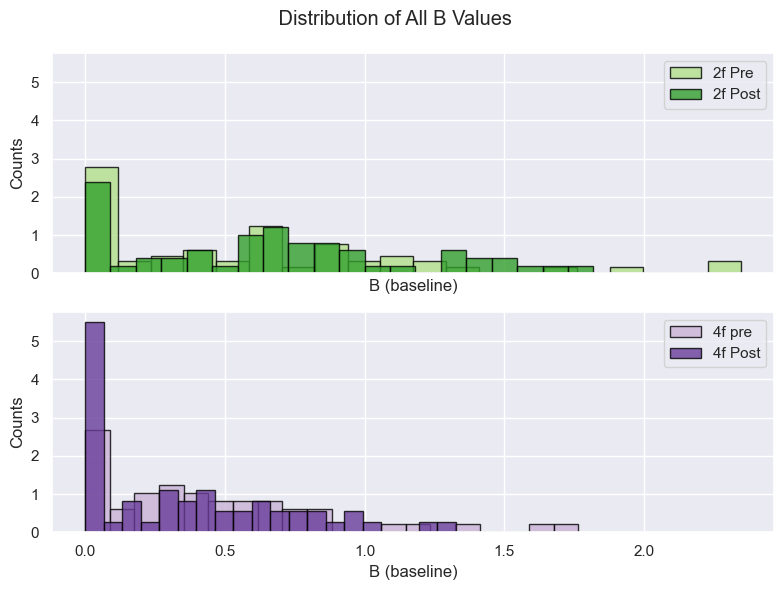

In [359]:
fig, axs = plt.subplots(2,1,figsize = (8,6), sharey = True, sharex = True)

axs[0].hist(b_store[0], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[2], label = '2f Pre')
axs[0].hist(b_store[1], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[3], label = '2f Post')

axs[1].hist(b_store[2], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[8], label = '4f pre')
axs[1].hist(b_store[3], bins = 20, ec = 'black',alpha = 0.8, density = True, align = 'mid',histtype='bar', color = c[9], label = '4f Post')
plt.suptitle(' Distribution of All B Values')
axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('B (baseline)')
axs[1].set_xlabel('B (baseline)')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
plt.tight_layout()
plt.show()